In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

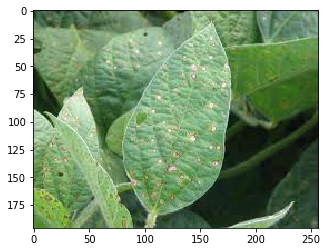

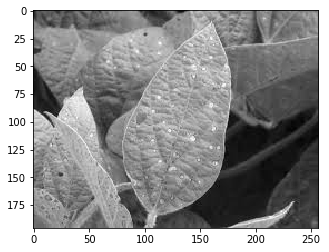

In [44]:
# Load image
img = cv2.imread('frogeye_leaf_spot.jpg')

def colorConv(imgI,original,desired):
    #simplifies call for color conversion
    convString = 'COLOR_' + original.upper() + '2' + desired.upper()
    imgO = cv2.cvtColor(imgI,getattr(cv2,convString))
    return imgO

# Flip channels for matplotlib inline plotting
img_rgb = colorConv(img,'bgr','rgb')
plt.imshow(img_rgb)
plt.show()

# Grayscale image
img_g = colorConv(img,'bgr','gray')
plt.imshow(img_g,'gray')
plt.show()

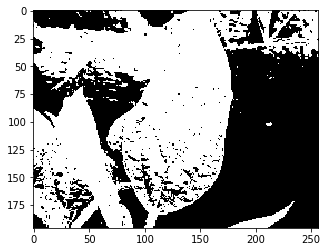

In [33]:
mask = np.zeros_like(img_g)
mask[(img_g >= 125) & (img_g <= 256)] = 1
plt.imshow(mask,'gray')
plt.show()

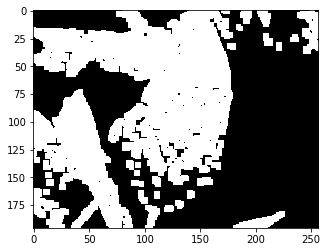

In [38]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel)
plt.imshow(erosion,'gray')
plt.show()

In [70]:
def sobel(img,axis,kernel_size=3):
    if len(img.shape) > 2:
        raise ValueError('Image must have only 1 channel (Ex: grayscale)')
    if axis == 'x':
        sobel = cv2.Sobel(img,cv2.CV_64F,1,0,ksize = kernel_size)
    elif axis == 'y':
        sobel = cv2.Sobel(img,cv2.CV_64F,0,1,ksize = kernel_size)
    else:
        raise ValueError('Axis choice must be x or y.')
    return sobel

def absSobel(sobel,thresh):
    #take absolute value of sobel gradient
    abs_sobel = np.absolute(sobel)
    #scale to 8-bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    #set up binary array
    binary_out = np.zeros_like(scaled_sobel)
    #apply thresholding
    binary_out[(scaled_sobel>=thresh[0])&(scaled_sobel<=thresh[1])]=1
    return binary_out

def magSobel(sobel_x,sobel_y,thresh):
    #Calculate magnitude of gradients
    mag_sobel = np.sqrt(sobel_x**2+sobel_y**2)
    #scale to 8-bit integer
    scaled_sobel = np.uint8(255*mag_sobel/np.max(mag_sobel))
    #set up binary array
    binary_out = np.zeros_like(scaled_sobel)
    #apply thresholding
    binary_out[(scaled_sobel>=thresh[0])&(scaled_sobel<=thresh[1])]=1
    return binary_out

def dirSobel(sobel_x,sobel_y,thresh):
    abs_sobel_x = np.absolute(sobel_x)
    abs_sobel_y = np.absolute(sobel_y)
    #Calculate direction of the gradient
    abs_grad_dir = np.arctan2(abs_sobel_y,abs_sobel_x)
    #set up binary array
    binary_out = np.zeros_like(abs_grad_dir)
    #apply thresholding
    binary_out[(abs_grad_dir>=thresh[0])&(abs_grad_dir<=thresh[1])]=1
    return binary_out

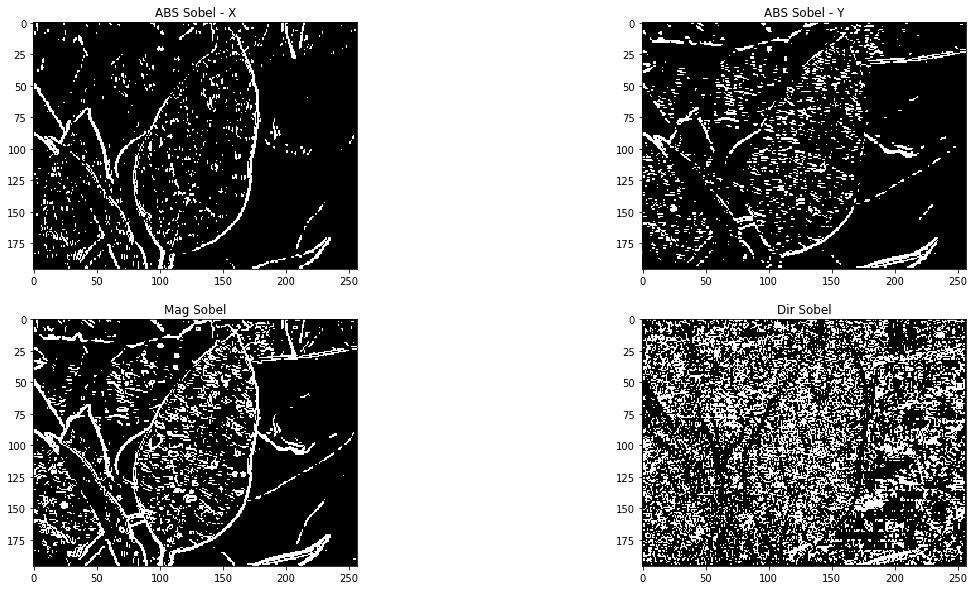

In [81]:
sX = sobel(img_g,'x')
sY = sobel(img_g,'y')

absSX = absSobel(sX,(40,256))
absSY = absSobel(sY,(40,256))
magS = magSobel(sX,sY,(40,256))
dirS = dirSobel(sX,sY,(1,1.5))

# Plotting thresholded images
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(20,10))
ax1.set_title('ABS Sobel - X')
ax1.imshow(absSX,cmap='gray')
ax2.set_title('ABS Sobel - Y')
ax2.imshow(absSY,cmap='gray')
ax3.set_title('Mag Sobel')
ax3.imshow(magS,cmap='gray')
ax4.set_title('Dir Sobel')
ax4.imshow(dirS,cmap='gray')
plt.show()

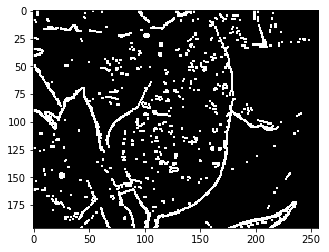

In [86]:
opening = cv2.morphologyEx(magS,cv2.MORPH_OPEN,kernel=np.ones((2,2),np.uint8))
plt.imshow(opening,'gray')
plt.show()

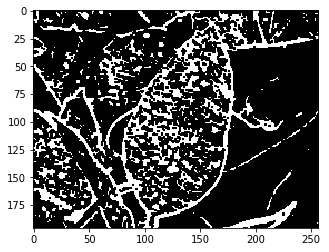

In [87]:
closing = cv2.morphologyEx(magS,cv2.MORPH_CLOSE,kernel=np.ones((2,2),np.uint8))
plt.imshow(closing,'gray')
plt.show()

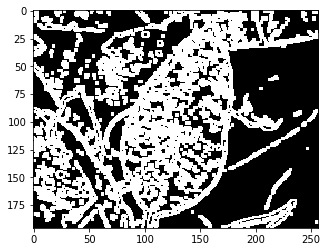

In [91]:
gradient = cv2.morphologyEx(magS, cv2.MORPH_GRADIENT, kernel=np.ones((3,3),np.uint8))
plt.imshow(gradient,'gray')
plt.show()